# 가장 먼 노드
<div class="guide-section-description">
      <h6 class="guide-section-title">문제 설명</h6>
      <div class="markdown solarized-dark"><p>n개의 노드가 있는 그래프가 있습니다. 각 노드는 1부터 n까지 번호가 적혀있습니다. 1번 노드에서 가장 멀리 떨어진 노드의 갯수를 구하려고 합니다. 가장 멀리 떨어진 노드란 최단경로로 이동했을 때 간선의 개수가 가장 많은 노드들을 의미합니다.</p>

<p>노드의 개수 n, 간선에 대한 정보가 담긴 2차원 배열 vertex가 매개변수로 주어질 때, 1번 노드로부터 가장 멀리 떨어진 노드가 몇 개인지를 return 하도록 solution 함수를 작성해주세요.</p>

<h5>제한사항</h5>

<ul>
<li>노드의 개수 n은 2 이상 20,000 이하입니다.</li>
<li>간선은 양방향이며 총 1개 이상 50,000개 이하의 간선이 있습니다.</li>
<li>vertex 배열 각 행 [a, b]는 a번 노드와 b번 노드 사이에 간선이 있다는 의미입니다.</li>
</ul>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>n</th>
<th>vertex</th>
<th>return</th>
</tr>
</thead>
        <tbody><tr>
<td>6</td>
<td>[[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]]</td>
<td>3</td>
</tr>
</tbody>
      </table>
<h5>입출력 예 설명</h5>

<p>예제의 그래프를 표현하면 아래 그림과 같고, 1번 노드에서 가장 멀리 떨어진 노드는 4,5,6번 노드입니다.</p>

<p><img src="https://grepp-programmers.s3.amazonaws.com/files/ybm/fadbae38bb/dec85ab5-0273-47b3-ba73-fc0b5f6be28a.png" title="" alt="image.png"></p>
</div>
    </div>

In [1]:
from collections import deque

def bfs(v, visited, adj):
    count = 0
    q = deque([[v, count]])
    while q:
        value = q.popleft()
        v = value[0]
        count = value[1]
        if visited[v] == -1:
            visited[v] = count
            count += 1
            for e in adj[v]:
                q.append([e, count])

def solution(n, edge):
    answer = 0
    visited = [-1] * (n + 1)
    adj = [[] for _ in range(n + 1)]
    for e in edge:
        x = e[0]
        y = e[1]
        adj[x].append(y)
        adj[y].append(x)
    bfs(1, visited, adj)
    for value in visited:
        if value == max(visited):
            answer += 1
    return answer

vertex = [[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]]
n = 6
solution(n, vertex)

3

# 보석쇼핑
<div class="markdown solarized-dark"><p><strong>[본 문제는 정확성과 효율성 테스트 각각 점수가 있는 문제입니다.]</strong></p>

<p>개발자 출신으로 세계 최고의 갑부가 된 <code>어피치</code>는 스트레스를 받을 때면 이를 풀기 위해 오프라인 매장에 쇼핑을 하러 가곤 합니다.<br>
어피치는 쇼핑을 할 때면 매장 진열대의 특정 범위의 물건들을 모두 싹쓸이 구매하는 습관이 있습니다.<br>
어느 날 스트레스를 풀기 위해 보석 매장에 쇼핑을 하러 간 어피치는 이전처럼 진열대의 특정 범위의 보석을 모두 구매하되 특별히 아래 목적을 달성하고 싶었습니다.<br>
<code>진열된 모든 종류의 보석을 적어도 1개 이상 포함하는 가장 짧은 구간을 찾아서 구매</code></p>

<p>예를 들어 아래 진열대는 4종류의 보석(RUBY, DIA, EMERALD, SAPPHIRE) 8개가 진열된 예시입니다.</p>
<table class="table">
        <thead><tr>
<th>진열대 번호</th>
<th>1</th>
<th>2</th>
<th>3</th>
<th>4</th>
<th>5</th>
<th>6</th>
<th>7</th>
<th>8</th>
</tr>
</thead>
        <tbody><tr>
<td>보석 이름</td>
<td>DIA</td>
<td>RUBY</td>
<td><strong>RUBY</strong></td>
<td><strong>DIA</strong></td>
<td><strong>DIA</strong></td>
<td><strong>EMERALD</strong></td>
<td><strong>SAPPHIRE</strong></td>
<td>DIA</td>
</tr>
</tbody>
      </table>
<p>진열대의 3번부터 7번까지 5개의 보석을 구매하면 모든 종류의 보석을 적어도 하나 이상씩 포함하게 됩니다.  </p>

<p>진열대의 3, 4, 6, 7번의 보석만 구매하는 것은 중간에 특정 구간(5번)이 빠지게 되므로 어피치의 쇼핑 습관에 맞지 않습니다.</p>

<p>진열대 번호 순서대로 보석들의 이름이 저장된 배열 gems가 매개변수로 주어집니다. 이때 모든 보석을 하나 이상 포함하는 가장 짧은 구간을 찾아서 return 하도록 solution 함수를 완성해주세요.<br>
가장 짧은 구간의 <code>시작 진열대 번호</code>와 <code>끝 진열대 번호</code>를 차례대로 배열에 담아서 return 하도록 하며, 만약 가장 짧은 구간이 여러 개라면 <code>시작 진열대 번호</code>가 가장 작은 구간을 return 합니다.</p>

<h5><strong>[제한사항]</strong></h5>

<ul>
<li>gems 배열의 크기는 1 이상 100,000 이하입니다.

<ul>
<li>gems 배열의 각 원소는 진열대에 나열된 보석을 나타냅니다.</li>
<li>gems 배열에는 1번 진열대부터 진열대 번호 순서대로 보석이름이 차례대로 저장되어 있습니다.</li>
<li>gems 배열의 각 원소는 길이가 1 이상 10 이하인 알파벳 대문자로만 구성된 문자열입니다.</li>
</ul></li>
</ul>

<hr>

<h5><strong>입출력 예</strong></h5>
<table class="table">
        <thead><tr>
<th>gems</th>
<th>result</th>
</tr>
</thead>
        <tbody><tr>
<td><code>["DIA", "RUBY", "RUBY", "DIA", "DIA", "EMERALD", "SAPPHIRE", "DIA"]</code></td>
<td>[3, 7]</td>
</tr>
<tr>
<td><code>["AA", "AB", "AC", "AA", "AC"]</code></td>
<td>[1, 3]</td>
</tr>
<tr>
<td><code>["XYZ", "XYZ", "XYZ"]</code></td>
<td>[1, 1]</td>
</tr>
<tr>
<td><code>["ZZZ", "YYY", "NNNN", "YYY", "BBB"]</code></td>
<td>[1, 5]</td>
</tr>
</tbody>
      </table>
<h5><strong>입출력 예에 대한 설명</strong></h5>

<p><strong>입출력 예 #1</strong><br>
문제 예시와 같습니다.</p>

<p><strong>입출력 예 #2</strong><br>
3종류의 보석(AA, AB, AC)을 모두 포함하는 가장 짧은 구간은 [1, 3], [2, 4]가 있습니다. <br>
<code>시작 진열대 번호</code>가 더 작은 [1, 3]을 return 해주어야 합니다.</p>

<p><strong>입출력 예 #3</strong><br>
1종류의 보석(XYZ)을 포함하는 가장 짧은 구간은 [1, 1], [2, 2], [3, 3]이 있습니다. <br>
<code>시작 진열대 번호</code>가 가장 작은 [1, 1]을 return 해주어야 합니다.</p>

<p><strong>입출력 예 #4</strong><br>
4종류의 보석(ZZZ, YYY, NNNN, BBB)을 모두 포함하는 구간은 [1, 5]가 유일합니다.<br>
그러므로 [1, 5]를 return 해주어야 합니다.</p>

<p>※ 공지 - 2020년 7월 21일 테스트케이스가 추가되었습니다.</p>
</div>

In [2]:
'''
1. 보석의 종류를 센다
2. 보석 dictionary 초기화
3. gems를 돌면서 dict에 보석과 자리를 업데이트
4. dict의 길이와 보석종류 개수가 일치하면 구간 저장
5. 구간 중에서 번호가 더 작거나 짧은 구간을 최종 리턴

효율성 주겨버려~
'''
gems = ["DIA", "RUBY", "RUBY", "DIA", "DIA", "EMERALD", "SAPPHIRE", "DIA"]
num_category = len(set(gems))
gem_dict = dict()
section_dict = {i:[] for i in range(len(gems))}

for index, gem in enumerate(gems):
    gem_dict[gem] = index
    
    if len(gem_dict) == num_category:
        min_val = min(gem_dict.values()) + 1
        max_val = max(gem_dict.values()) + 1
        gap = max_val - min_val
        values = [min_val, max_val]
        
        section_dict[gap].append(values)
        
for i in section_dict:
    if section_dict[i]:
        min_values = section_dict[i]
        break
        
min_values.sort()
min_values[0]

[3, 7]

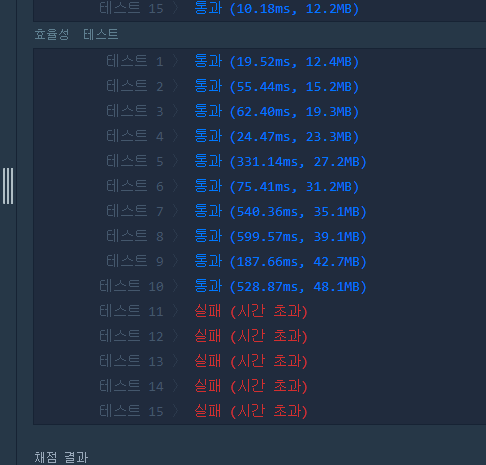

# 숫자게임
<div class="guide-section-description">
      <h6 class="guide-section-title">문제 설명</h6>
      <div class="markdown solarized-dark"><p>xx 회사의 2xN명의 사원들은 N명씩 두 팀으로 나눠 숫자 게임을 하려고 합니다. 두 개의 팀을 각각 A팀과 B팀이라고 하겠습니다. 숫자 게임의 규칙은 다음과 같습니다.</p>

<ul>
<li>먼저 모든 사원이 무작위로 자연수를 하나씩 부여받습니다.</li>
<li>각 사원은 딱 한 번씩 경기를 합니다.</li>
<li>각 경기당 A팀에서 한 사원이, B팀에서 한 사원이 나와 서로의 수를 공개합니다. 그때 숫자가 큰 쪽이 승리하게 되고, 승리한 사원이 속한 팀은 승점을 1점 얻게 됩니다.</li>
<li>만약 숫자가 같다면 누구도 승점을 얻지 않습니다.</li>
</ul>

<p>전체 사원들은 우선 무작위로 자연수를 하나씩 부여받았습니다. 그다음 A팀은 빠르게 출전순서를 정했고 자신들의 출전 순서를 B팀에게 공개해버렸습니다. B팀은 그것을 보고 자신들의 최종 승점을 가장 높이는 방법으로 팀원들의 출전 순서를 정했습니다. 이때의 B팀이 얻는 승점을 구해주세요.<br>
A 팀원들이 부여받은 수가 출전 순서대로 나열되어있는 배열 <code>A</code>와 i번째 원소가 B팀의 i번 팀원이 부여받은 수를 의미하는 배열 <code>B</code>가 주어질 때, B 팀원들이 얻을 수 있는 최대 승점을 return 하도록 solution 함수를 완성해주세요.</p>

<h5>제한사항</h5>

<ul>
<li><code>A</code>와 <code>B</code>의 길이는 같습니다.</li>
<li><code>A</code>와 <code>B</code>의 길이는 <code>1</code> 이상 <code>100,000</code> 이하입니다.</li>
<li><code>A</code>와 <code>B</code>의 각 원소는 <code>1</code> 이상 <code>1,000,000,000</code> 이하의 자연수입니다.</li>
</ul>

<hr>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>A</th>
<th>B</th>
<th>result</th>
</tr>
</thead>
        <tbody><tr>
<td>[5,1,3,7]</td>
<td>[2,2,6,8]</td>
<td>3</td>
</tr>
<tr>
<td>[2,2,2,2]</td>
<td>[1,1,1,1]</td>
<td>0</td>
</tr>
</tbody>
      </table>
<h5>입출력 예 설명</h5>

<p>입출력 예 #1<br>
<img src="https://res.cloudinary.com/sgc109/image/upload/c_scale,w_500/v1516695907/number_game2_yt913p.png" title="" alt="image"><br>
A 팀은 숫자 5를 부여받은 팀원이 첫번째로 출전하고, 이어서 1,3,7을 부여받은 팀원들이 차례대로 출전합니다.<br>
B 팀원들을 4번, 2번, 3번, 1번의 순서대로 출전시킬 경우 팀원들이 부여받은 숫자들은 차례대로 8,2,6,2가 됩니다. 그러면, 첫 번째, 두 번째, 세 번째 경기에서 승리하여 3점을 얻게 되고, 이때가 최대의 승점입니다.</p>

<p>입출력 예 #2<br>
B 팀원들을 어떤 순서로 출전시켜도 B팀의 승점은 0점입니다.</p>
</div>
    </div>

In [51]:
'''
이길 수 없다면 가장 작은 값을 주자
1. 두 팀 sort 
2. 각 팀 큰 수부터 비교한다
    2-1. A가 이겼으면 index A -= 1
    2-2. B가 이겼으면 index B -= 1, result += 1
'''
A = [5,1,3,7]
B = [2,2,6,8]
def solution(A, B):
    A.sort()
    B.sort()
    result = 0
    index_a = index_b = len(A) - 1
    
    while index_a >= 0:
        a = A[index_a]
        b = B[index_b]
        
        if b > a:
            index_b -= 1
            result += 1
            
        index_a -= 1
        
    return result

solution(A, B)

[1, 3, 5, 7]


3

# 순위
<div class="guide-section-description">
      <h6 class="guide-section-title">문제 설명</h6>
      <div class="markdown solarized-dark"><p>n명의 권투선수가 권투 대회에 참여했고 각각 1번부터 n번까지 번호를 받았습니다. 권투 경기는 1대1 방식으로 진행이 되고, 만약 A 선수가 B 선수보다 실력이 좋다면 A 선수는 B 선수를 항상 이깁니다. 심판은 주어진 경기 결과를 가지고 선수들의 순위를 매기려 합니다. 하지만 몇몇 경기 결과를 분실하여 정확하게 순위를 매길 수 없습니다.</p>

<p>선수의 수 n, 경기 결과를 담은 2차원 배열 results가 매개변수로 주어질 때 정확하게 순위를 매길 수 있는 선수의 수를 return 하도록 solution 함수를 작성해주세요.</p>

<h5>제한사항</h5>

<ul>
<li>선수의 수는 1명 이상 100명 이하입니다.</li>
<li>경기 결과는 1개 이상 4,500개 이하입니다.</li>
<li>results 배열 각 행 [A, B]는 A 선수가 B 선수를 이겼다는 의미입니다.</li>
<li>모든 경기 결과에는 모순이 없습니다.</li>
</ul>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>n</th>
<th>results</th>
<th>return</th>
</tr>
</thead>
        <tbody><tr>
<td>5</td>
<td>[[4, 3], [4, 2], [3, 2], [1, 2], [2, 5]]</td>
<td>2</td>
</tr>
</tbody>
      </table>
<h5>입출력 예 설명</h5>

<p>2번 선수는 [1, 3, 4] 선수에게 패배했고 5번 선수에게 승리했기 때문에 4위입니다.<br>
5번 선수는 4위인 2번 선수에게 패배했기 때문에 5위입니다.</p>

<p><a href="http://contest.usaco.org/JAN08.htm" target="_blank" rel="noopener">출처</a></p>
</div>
    </div>

In [16]:
'''
모든 선수마다 win, lose dict를 만들고, 특정 선수의 dict에 다른 선수들이
모두 등장하면 해당 선수의 위치를 정확히 알 수 있다

1. {1:(), 2:() ... } 형식의 win, lose dictionary 초기화
2. results 돌면서 win, lose 업데이트 
3. win과 lose를 참고해서 나머지 선수들도  업데이트

'''
results = [[4, 3], [4, 2], [3, 2], [1, 2], [2, 5]]
n = 5

total_dict = {}
total_dict['win'] = {i+1 : set() for i in range(n)}
total_dict['lose'] = {i+1 : set() for i in range(n)}

for i in results:
    total_dict['win'][i[0]].add(i[1])
    total_dict['lose'][i[1]].add(i[0]) 
    
print(total_dict)

for i in range(1, n+1):
    for lose in total_dict['lose'][i]:
        for win in total_dict['win'][i]:
            total_dict['win'][lose].add(win)    
    
    for win in total_dict['win'][i]:
        for lose in total_dict['lose'][i]:
            total_dict['lose'][win].add(lose)
total_dict

{'win': {1: {2}, 2: {5}, 3: {2}, 4: {2, 3}, 5: set()}, 'lose': {1: set(), 2: {1, 3, 4}, 3: {4}, 4: set(), 5: {2}}}


{'win': {1: {2, 5}, 2: {5}, 3: {2, 5}, 4: {2, 3, 5}, 5: set()},
 'lose': {1: set(), 2: {1, 3, 4}, 3: {4}, 4: set(), 5: {1, 2, 3, 4}}}